In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("CryptoData.csv")
data.head(10)
data.tail(5)
data.info()
data.shape
data.describe()
data.columns
data.dtypes

Saving CryptoData.csv to CryptoData.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


unix           float64
date            object
symbol          object
open           float64
high           float64
low            float64
close          float64
Volume XRP     float64
Volume USDT    float64
dtype: object

# **Cleaning Dataset and Detecting Outliers**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

data.tail(5)

missing_vales = data.isnull().sum()
print("Missing Values")
print(missing_vales)

data.dropna(inplace=True)

duplicate_rows = data[data.duplicated()]
print("Duplicate Rows")
print(duplicate_rows)

data.drop_duplicates(inplace=True)

def handle_outliers(column,z_threshold=3):
  z_scores = np.abs((column - column.mean())/column.std())
  filtered_data = column[z_scores < z_threshold]
  return filtered_data

handleoutlier = data.copy()
handleoutlier["close"] = handle_outliers(handleoutlier["close"])
outliers = data[~data.index.isin(handleoutlier.index)]
print("Outliers")
print(outliers)

Saving CryptoData.csv to CryptoData (1).csv
Missing Values
unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
Volume XRP     0
Volume USDT    0
dtype: int64
Duplicate Rows
Empty DataFrame
Columns: [unix, date, symbol, open, high, low, close, Volume XRP, Volume USDT]
Index: []
Outliers
Empty DataFrame
Columns: [unix, date, symbol, open, high, low, close, Volume XRP, Volume USDT]
Index: []


# **Analyzing and Visualizing Volatility**

Saving CryptoData.csv to CryptoData (2).csv
Daily Volatility: 0.06220607646803948
Annual Volatility Year
2018    0.056578
2019    0.037813
2020    0.068371
2021    0.077397
Name: Daily_Returns, dtype: float64


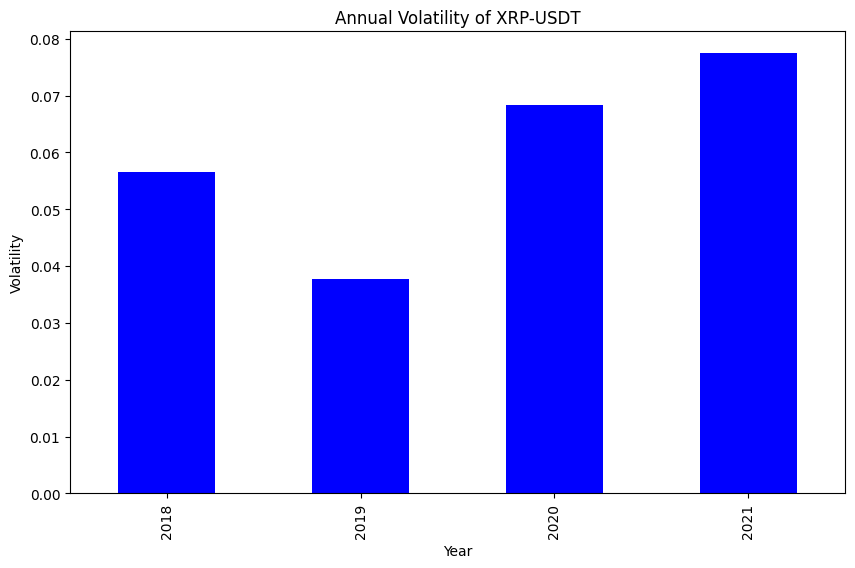

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

data["Daily_Returns"] = data["close"].pct_change()

daily_volatility = data["Daily_Returns"].std()

data["Year"] = pd.to_datetime(data["date"]).dt.year

annual_volatility = data.groupby("Year")["Daily_Returns"].std()

print("Daily Volatility:", daily_volatility)
print("Annual Volatility", annual_volatility)

plt.figure(figsize=(10,6))
annual_volatility.plot(kind="bar",color="blue")
plt.title("Annual Volatility of XRP-USDT")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.show()

# **Forecasting with Prophet**

Saving CryptoData.csv to CryptoData (3).csv


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxwva1oa/q1h6k_x8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxwva1oa/uk9zanr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66952', 'data', 'file=/tmp/tmpoxwva1oa/q1h6k_x8.json', 'init=/tmp/tmpoxwva1oa/uk9zanr0.json', 'output', 'file=/tmp/tmpoxwva1oa/prophet_modelvqan0r4z/prophet_model-20231125070702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasted Price:
             ds      yhat
1334 2021-12-28  1.020703
1335 2021-12-29  1.018996
1336 2021-12-30  1.017031
1337 2021-12-31  1.016752
1338 2022-01-01  1.020645
1339 2022-01-02  1.019426
1340 2022-01-03  1.022164
1341 2022-01-04  1.023243
1342 2022-01-05  1.022155
1343 2022-01-06  1.020797


<function matplotlib.pyplot.show(close=None, block=None)>

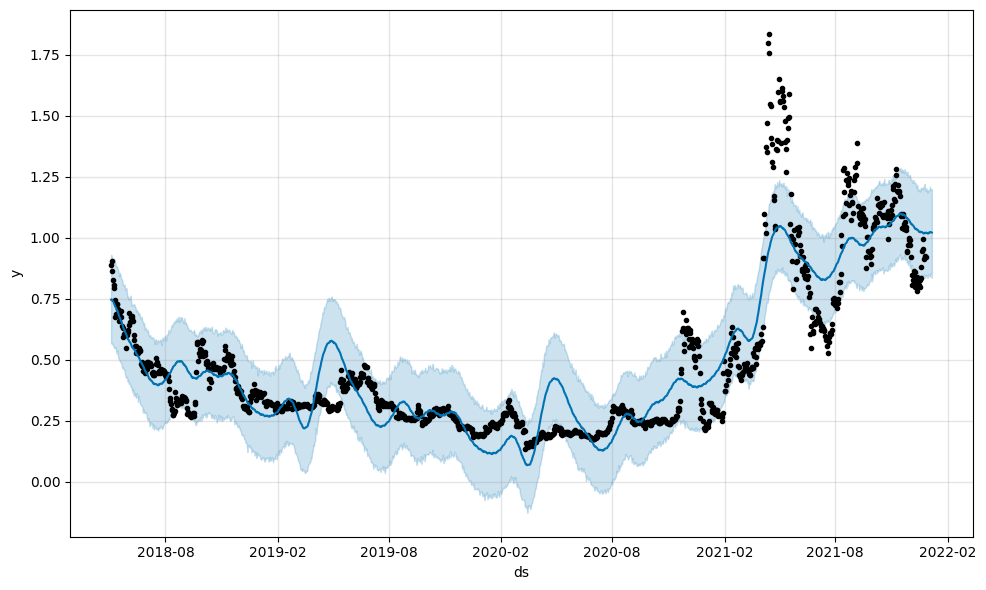

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from prophet import Prophet

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

data = data.rename(columns={"date":"ds","close":"y"})

model = Prophet()
model.fit(data)

future = model.make_future_dataframe(periods=10)

forecast = model.predict(future)

# Print the results
forecasted_prices = forecast[["ds","yhat"]].tail(10)
print("Forecasted Price:")
print(forecasted_prices)

fig = model.plot(forecast)
plt.show

# **Detecting trend with Moving Average**

Saving CryptoData.csv to CryptoData (4).csv


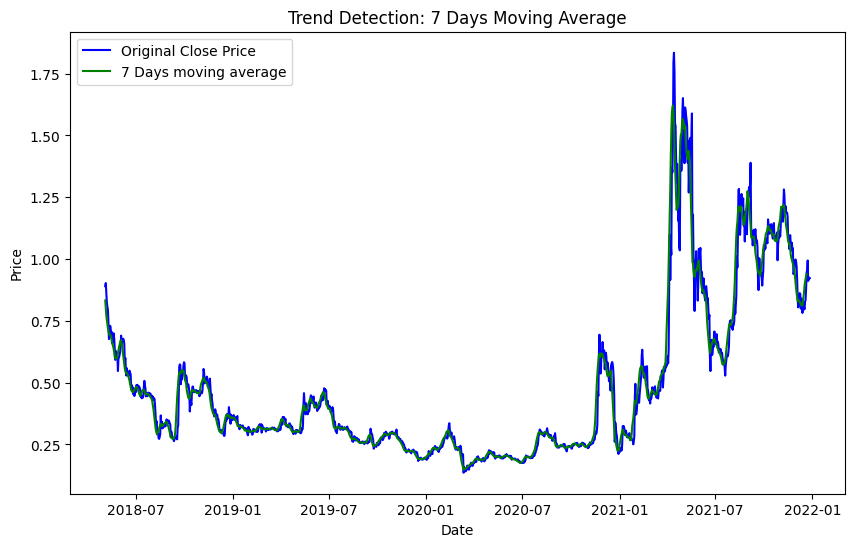

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

data["date"] = pd.to_datetime(data["date"])

data.set_index("date", inplace=True)

# Calculate 7 Days moving average
data["Moving_avg"] = data["close"].rolling(window=7).mean()

plt.figure(figsize=(10,6))
plt.plot(data.index, data["close"],label="Original Close Price",color="blue")
plt.plot(data.index, data["Moving_avg"],label="7 Days moving average",color="green")
plt.title("Trend Detection: 7 Days Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# **Forecasting with time series decomposition**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from statsmodels.tsa.seasonal import STL


data = pd.read_csv("CryptoData.csv")

data.head()

data["date"] = pd.to_datetime(data["date"])

prices = data["close"]

stl = STL(prices,period=60,seasonal=7)
result = stl.fit()

seasonal = result.seasonal
trend = result.trend
reisdual = result.resid

# Forecast price for the next 5 days
last_date = data["date"].iloc[-1]
Print(last_date)
forecast_date = pd.date_range(start=last_date, periods=5, freq="D")
forecasted_prices = trend + seasonal + reisdual

print("Forecasted prices for the next 5 days")
for date, price in zip(forecast_date, forecasted_prices):
  print(f"{date.date()}:{price:.2f}")

Saving CryptoData.csv to CryptoData (5).csv
Forecasted prices for the next 5 days
2018-05-04:0.92
2018-05-05:0.92
2018-05-06:0.93
2018-05-07:0.91
2018-05-08:0.99


# **Finding correlation between price and volume**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import tensorflow as tf

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

features = data["Volume XRP"]
target = data["close"]

model = tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
model.compile(optimizer='sgd',loss="mean_squared_error")

# Train the model
model.fit(features,target, epochs=100,verbose=0)

correlation = np.corrcoef(features,target)[0,1]
print(f"Correlation coefficient: {correlation:.2f}")

Saving CryptoData.csv to CryptoData.csv
Correlation coefficient: 0.36


# **Forecasting with random forest and xgboost**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

features = data[["open","high","low","close","Volume XRP"]]
target = data["close"]

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

# Random Forest Algorithm
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost Algorithm
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

last_data = data.iloc[-1][["open","high","low","close","Volume XRP"]].values.reshape(1,-1)
prediction_rf = rf_model.predict(last_data)
prediction_xgb = xgb_model.predict(last_data)
average_prediction = (prediction_rf + prediction_xgb)/2

print("Forcasted Price:")
print(average_prediction)

Saving CryptoData.csv to CryptoData (1).csv
Forcasted Price:
[0.88468256]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **Prediction interval coverage**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7i2w2kj/jdnc45hx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7i2w2kj/r8end16v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40021', 'data', 'file=/tmp/tmpz7i2w2kj/jdnc45hx.json', 'init=/tmp/tmpz7i2w2kj/r8end16v.json', 'output', 'file=/tmp/tmpz7i2w2kj/prophet_modelnr3qu67l/prophet_model-20231125101548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saving CryptoData.csv to CryptoData (3).csv


10:15:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasted Price:
             ds      yhat
1334 2021-12-28  1.020703
1335 2021-12-29  1.018996
1336 2021-12-30  1.017031
1337 2021-12-31  1.016752
1338 2022-01-01  1.020645
1339 2022-01-02  1.019426
1340 2022-01-03  1.022164
1341 2022-01-04  1.023243
1342 2022-01-05  1.022155
1343 2022-01-06  1.020797


ValueError: ignored

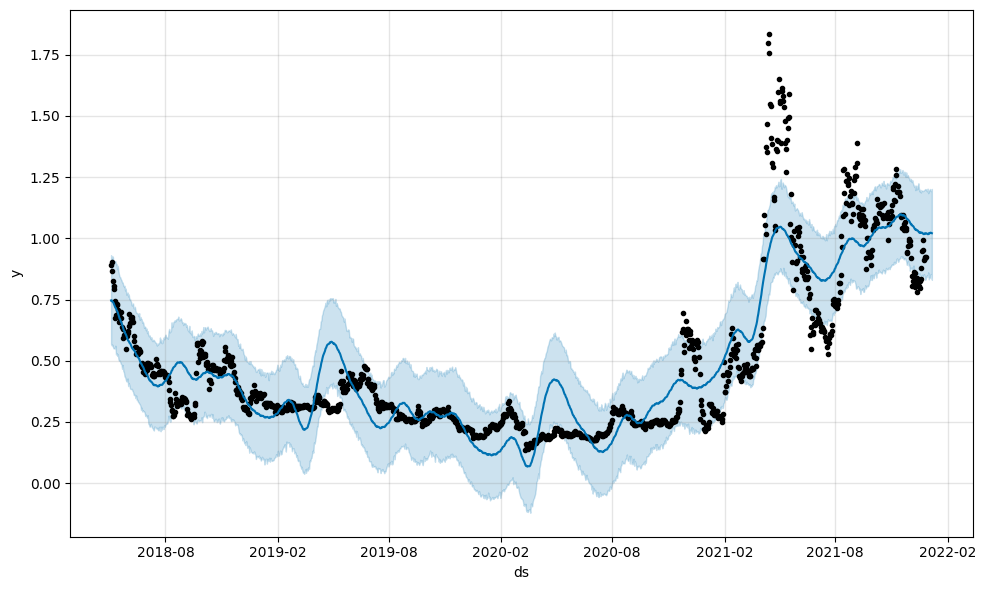

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from prophet import Prophet

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

data = data.rename(columns={"date":"ds","close":"y"})

model = Prophet()
model.fit(data)

future = model.make_future_dataframe(periods=10)

forecast = model.predict(future)

# Print the results
forecasted_prices = forecast[["ds","yhat"]].tail(10)
print("Forecasted Price:")
print(forecasted_prices)

fig = model.plot(forecast)
plt.show

# Prediction Interval Coverage
forecasted_values = forecast[["ds","yhat","yhat_lower","yhat_upper"]]
actual_values = data[["ds","y"]]
merged = forecasted_values.merge(actual_values,on="ds",how="left")

correct_coverage = ((merged['y']>=merged["yhat_lower"]) & (merged['y']<=merged["yhat_upper"])).sum()/len(merged) * 100
print(correct_coverage)

data["ds"] = pd.to_datetime(data["ds"])

# **Component Analysis**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from statsmodels.tsa.seasonal import STL

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

data["date"] = pd.to_datetime(data["date"])

prices = data["close"]

stl = STL(prices,period=60,seasonal=7)
result = stl.fit()

seasonal = result.seasonal
trend = result.trend
residual = result.resid

# Forecast price for the next 5 days
last_date = data["date"].iloc[-1]
forecast_date = pd.date_range(start=last_date, periods=5, freq="D")
forecasted_prices = trend + seasonal + residual

print("Forecasted prices for the next 5 days")
for date, price in zip(forecast_date, forecasted_prices):
  print(f"{date.date()}:{price:.2f}")

# Component Analysis
seasonal_naive = prices.rolling(window=13, min_periods=1, center=True).mean()
trend_naive = prices.rolling(window=30, min_periods=1, center=True).mean()
resid_naive = prices - seasonal_naive - trend_naive

seasonal_accuracy = np.mean(np.abs(seasonal-seasonal_naive))
trend_accuracy = np.mean(np.abs(trend-trend_naive))
residual_accuracy = np.mean(np.abs(residual-resid_naive))

print("Component Analysis:")
print(seasonal_accuracy)
print(trend_accuracy)
print(residual_accuracy)

Saving CryptoData.csv to CryptoData (4).csv
Forecasted prices for the next 5 days
2018-05-04:0.92
2018-05-05:0.92
2018-05-06:0.93
2018-05-07:0.91
2018-05-08:0.99
Component Analysis:
0.4741287677359887
0.036825848185457456
0.4730575389074628


# **Feature Importance Analysis**

In [11]:
import pandas as pd
import numpy as np
from google.colab import files
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

data.head()

features = data[["open","high","low","close","Volume XRP"]]
target = data["close"]

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

# Random Forest Algorithm
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost Algorithm
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

last_data = data.iloc[-1][["open","high","low","close","Volume XRP"]].values.reshape(1,-1)
prediction_rf = rf_model.predict(last_data)
prediction_xgb = xgb_model.predict(last_data)
average_prediction = (prediction_rf + prediction_xgb)/2

print("Forcasted Price:")
print(average_prediction)

rf_feature_importance = rf_model.feature_importances_
xgb_feature_importance = xgb_model.feature_importances_
print(rf_feature_importance)
print(xgb_feature_importance)

Saving CryptoData.csv to CryptoData (6).csv
Forcasted Price:
[0.88468256]
[2.34878640e-04 1.68693969e-03 2.87248552e-03 9.95033074e-01
 1.72622524e-04]
[2.1015835e-04 3.3865559e-03 2.4820871e-03 9.9348450e-01 4.3668450e-04]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **KNN and Linear Regression**

In [8]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")

X = data[['open', 'high', 'low', 'Volume XRP', 'Volume USDT']]
y = data['close']

# Handle missing values if needed
# For example, X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)


# Print the MSE for each model
print(f'MSE for KNN: {mse_knn}')
print(f'MSE for Linear Regression: {mse_lr}')



Saving CryptoData.csv to CryptoData (4).csv
MSE for KNN: 0.0008251161814831465
MSE for Linear Regression: 0.0007828760843322034


# **ANN**

Saving CryptoData.csv to CryptoData (5).csv
Epoch 1/100
1065/1065 - 6s - loss: 0.0076 - 6s/epoch - 5ms/step
Epoch 2/100
1065/1065 - 3s - loss: 0.0011 - 3s/epoch - 2ms/step
Epoch 3/100
1065/1065 - 4s - loss: 0.0011 - 4s/epoch - 3ms/step
Epoch 4/100
1065/1065 - 3s - loss: 9.7306e-04 - 3s/epoch - 3ms/step
Epoch 5/100
1065/1065 - 3s - loss: 0.0010 - 3s/epoch - 3ms/step
Epoch 6/100
1065/1065 - 3s - loss: 9.1606e-04 - 3s/epoch - 2ms/step
Epoch 7/100
1065/1065 - 3s - loss: 9.3814e-04 - 3s/epoch - 3ms/step
Epoch 8/100
1065/1065 - 4s - loss: 9.1948e-04 - 4s/epoch - 4ms/step
Epoch 9/100
1065/1065 - 3s - loss: 9.3753e-04 - 3s/epoch - 3ms/step
Epoch 10/100
1065/1065 - 3s - loss: 9.1992e-04 - 3s/epoch - 3ms/step
Epoch 11/100
1065/1065 - 3s - loss: 9.3585e-04 - 3s/epoch - 3ms/step
Epoch 12/100
1065/1065 - 3s - loss: 9.0864e-04 - 3s/epoch - 3ms/step
Epoch 13/100
1065/1065 - 4s - loss: 8.3143e-04 - 4s/epoch - 4ms/step
Epoch 14/100
1065/1065 - 3s - loss: 9.2741e-04 - 3s/epoch - 3ms/step
Epoch 15/100
10

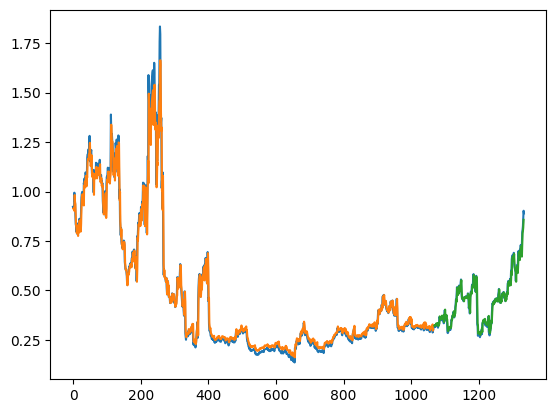

Epoch 1/100
1065/1065 - 6s - loss: 0.0069 - 6s/epoch - 5ms/step
Epoch 2/100
1065/1065 - 3s - loss: 0.0010 - 3s/epoch - 3ms/step
Epoch 3/100
1065/1065 - 4s - loss: 9.5832e-04 - 4s/epoch - 4ms/step
Epoch 4/100
1065/1065 - 3s - loss: 0.0010 - 3s/epoch - 3ms/step
Epoch 5/100
1065/1065 - 3s - loss: 8.6833e-04 - 3s/epoch - 3ms/step
Epoch 6/100
1065/1065 - 3s - loss: 9.3214e-04 - 3s/epoch - 3ms/step
Epoch 7/100
1065/1065 - 4s - loss: 9.8597e-04 - 4s/epoch - 3ms/step
Epoch 8/100
1065/1065 - 4s - loss: 9.7157e-04 - 4s/epoch - 3ms/step
Epoch 9/100
1065/1065 - 3s - loss: 0.0010 - 3s/epoch - 3ms/step
Epoch 10/100
1065/1065 - 3s - loss: 9.5727e-04 - 3s/epoch - 3ms/step
Epoch 11/100
1065/1065 - 3s - loss: 9.1524e-04 - 3s/epoch - 3ms/step
Epoch 12/100
1065/1065 - 4s - loss: 9.2078e-04 - 4s/epoch - 4ms/step
Epoch 13/100
1065/1065 - 3s - loss: 8.5265e-04 - 3s/epoch - 3ms/step
Epoch 14/100
1065/1065 - 3s - loss: 0.0010 - 3s/epoch - 3ms/step
Epoch 15/100
1065/1065 - 3s - loss: 9.4427e-04 - 3s/epoch - 3ms

In [10]:
import pandas as pd
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

data = pd.read_csv("CryptoData.csv")
# Display the first few rows of the dataset to understand its structure
data.head()

# Selecting 'close' price for prediction
data_close = data['close'].values.reshape(-1, 1)

# Handling missing values (if any)
data_close = np.nan_to_num(data_close)

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_close_scaled = scaler.fit_transform(data_close)

# Splitting the dataset into training and testing sets
train_size = int(len(data_close_scaled) * 0.8)
test_size = len(data_close_scaled) - train_size
train, test = data_close_scaled[0:train_size,:], data_close_scaled[train_size:len(data_close_scaled),:]

# Function to create dataset for time series
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, X_test.shape  # Checking the shape of the training and testing data


# Building the ANN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)
# Evaluate the model
model.evaluate(X_test, Y_test, verbose=2)

# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse scaling for a reality check
train_predict = scaler.inverse_transform(train_predict)
Y_train_inv = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test_inv = scaler.inverse_transform([Y_test])



# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data_close_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data_close_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_close_scaled)-1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Building the ANN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)


In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

data = pd.read_csv(file_name)

data_mean_filled = data.copy()
data_mean_filled['open'] = data_mean_filled['open'].fillna(data_mean_filled['open'].mean())
data_mean_filled['high'] = data_mean_filled['high'].fillna(data_mean_filled['high'].mean())

mean_filled_subset = pd.concat([
    data[['open', 'high']].head(10),
    data_mean_filled[['open', 'high']].head(10)
], axis=1)

mean_filled_subset.columns = ['open_original', 'high_original', 'open_mean_filled', 'high_mean_filled']

mean_filled_subset


Saving CryptoData.csv to CryptoData (8).csv


,open_original,high_original,open_mean_filled,high_mean_filled
0,0.9200,0.9237,0.92000,0.923700
1,0.9252,0.9334,0.92520,0.933400
2,0.9114,0.9350,0.91140,0.935000
3,NaN,0.9966,0.47221,0.996600
4,NaN,1.0167,0.47221,1.016700
5,NaN,0.9738,0.47221,0.973800
6,0.8799,NaN,0.87990,0.494933
7,0.8350,NaN,0.83500,0.494933
8,0.8263,0.8485,0.82630,0.848500
9,0.7967,0.8347,0.79670,0.834700
